### Part 1: Generate Table of Riboswitch Data

#### Access Sequences- Copying them manually from the paper figures, 5' to 3'
Figure 2A: Yes-1:  
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC   

Figure 4A: Not-1:  
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC  

Figure 5A: And- 1:  
GGGCGAACCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAGGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGGCCAGAGACAUA  

Figure 6A: Or- 1:  
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC

#### Generate Summary table using sqlite package in jupyter notebook
Note: -1 means that value doesn't exist for that sequence


In [5]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('my.db')
c = conn.cursor()
c.execute("""DROP TABLE riboswitch""")
c.execute("""CREATE TABLE riboswitch (id INTEGER PRIMARY KEY, name TEXT, startObs1 INT, endObs1 INT, startObs2 INT, endObs2 INT, startRed1 INT, endRed1 INT, startRed2 INT, endRed2 INT);""")
cmd = """INSERT INTO riboswitch (name, startObs1, endObs1, startObs2, endObs2, startRed1, endRed1, startRed2, endRed2) VALUES(?,?,?,?,?,?,?,?,?)"""
names = ["YES-1", "NOT-1", "AND-1", "OR-1"]
startObs1= [26, 44, 30, 27]
endObs1= [47, 66, 45, 46]
startObs2= [-1, -1, 49, 47]
endObs2 =[-1, -1, 64, 66]
startRed1 = [16, 40, 16, 16]
endRed1 = [21, 44, 23, 26]
startRed2 = [49, 74, 70, 67]
endRed2 =[54, 77, 77, 77]

i = 0
while i < len(names) :
    temp_value = (names[i], startObs1[i], endObs1[i], startObs2[i], endObs2[i], startRed1[i], endRed1[i], startRed2[i], endRed2[i])
    c.execute(cmd, temp_value)
    i += 1
    conn.commit()
df2 = pd.read_sql_query("select * from riboswitch;", conn)
df2

,id,name,startObs1,endObs1,startObs2,endObs2,startRed1,endRed1,startRed2,endRed2
0,1,YES-1,26,47,-1,-1,16,21,49,54
1,2,NOT-1,44,66,-1,-1,40,44,74,77
2,3,AND-1,30,45,49,64,16,23,70,77
3,4,OR-1,27,46,47,66,16,26,67,77


In [2]:
#Confirm sequence lengths match those in the paper
Yes1 = "GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"
print(len(Yes1))
Not1 = "GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC"
print(len(Not1))
And1 = "GGGCGAACCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAGGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGGCCAGAGACAUA"
print(len(And1))
Or1 = "GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"
print(len(Or1))

80
92
112
103


### Part 2: Run subprocess command to generate initial RNAfold plots

In [3]:
import subprocess
seqs = """>seq1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
>seq2
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
>seq3
GGGCGAACCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAGGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGGCCAGAGACAUA
>seq4
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
>@"""
p = subprocess.run(['RNAfold'], input = bytes(seqs, 'ascii'), stdout=subprocess.PIPE, stderr= subprocess.PIPE)

print(p.stdout.decode())

>seq1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).)))))))) (-33.00)
>seq2
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) (-28.10)
>seq3
GGGCGAACCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAGGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGGCCAGAGACAUA
.(((.(((((((((((((((...(((.....(((.((((.....)))).))).....)))..))))))).))).......(((((....)))))))))).)))......... (-39.60)
>seq4
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((.....(((.(((.......))).))).)))...)).))))))).))))).....(((((....))))).)))))))) (-40.00)



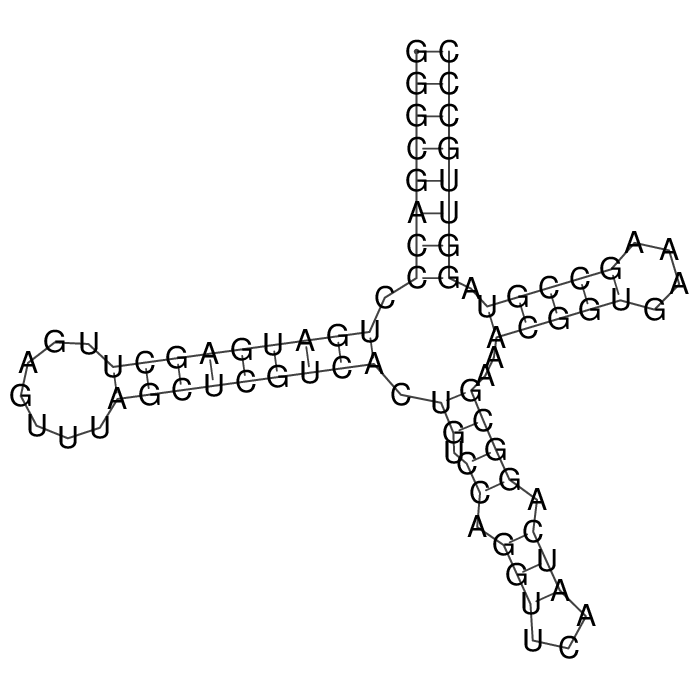

In [12]:
from IPython.display import Image, display
from wand.image import Image as WImage
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img1 = WImage(filename = "seq1_ss.pdf")
img1

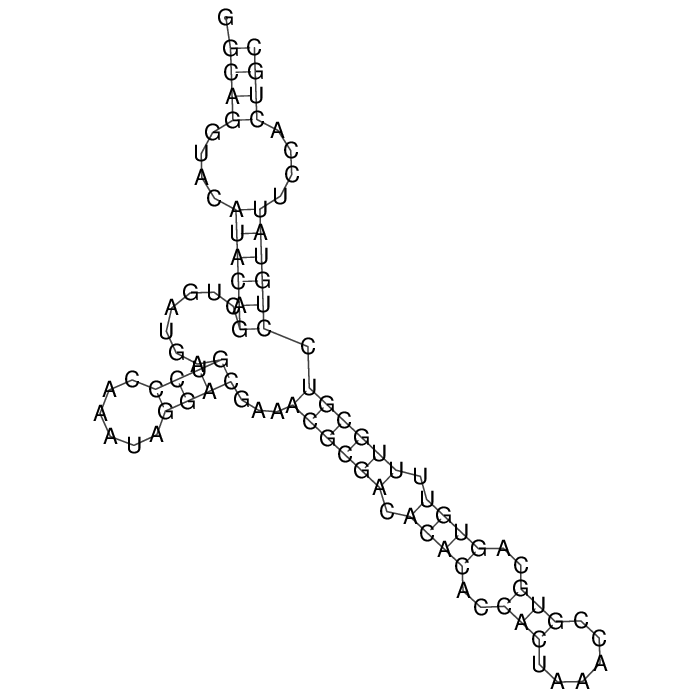

In [13]:
from IPython.display import Image, display
from wand.image import Image as WImage
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
img2 = WImage(filename = "seq2_ss.pdf")
img2

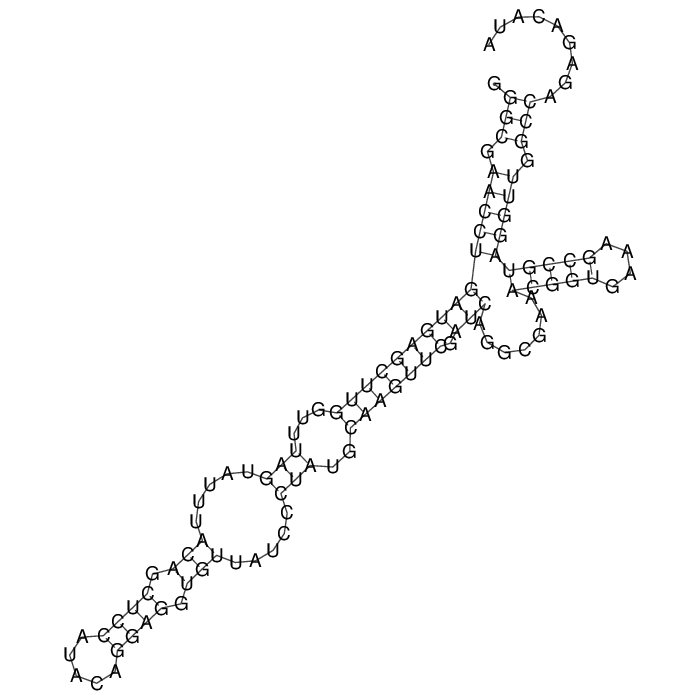

In [14]:
from IPython.display import Image, display
from wand.image import Image as WImage
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
img3 = WImage(filename = "seq3_ss.pdf")
img3

In [ ]:
from IPython.display import Image, display
from wand.image import Image as WImage
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
img4 = WImage(filename = "seq4_ss.pdf")
img4